# Understanding Different Metrics

<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>


### True positive and true negatives are the observations that are correctly predicted and therefore shown in green. We want to minimize false positives and false negatives so they are shown in red color. These terms are a bit confusing. So let’s take each term one by one and understand it fully.

## True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

## True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

### False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

## False Positives (FP) – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

## False Negatives (FN) – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

### Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

## Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

## Accuracy = TP+TN/TP+FP+FN+TN

## Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

## Precision = TP/TP+FP

## Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

## Recall = TP/TP+FN

## F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

## F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    
    
<img src="https://i.stack.imgur.com/U0hjG.pngg" alt="drawing" width="600" height="300"/>     
    
<img src="https://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png" alt="drawing" width="600" height="300"/>     
   

</strong></div>

# Test Classification Results

## Import Libraries,Preprocess data,Split Data to Train and Test

In [1]:
# Import Libraries
import pandas as pd

# Read the data and Create a copy
LoanData = pd.read_csv("01Exercise1.csv")
LoanPrep = LoanData.copy()


#find out columns with missing values
LoanPrep.isnull().sum(axis=0)


# Replace Missing Values. Drop the rows.
LoanPrep = LoanPrep.dropna()

# Drop irrelevant columns based on business sense
LoanPrep = LoanPrep.drop(['gender'], axis=1)

# Create Dummy variables
LoanPrep.dtypes
LoanPrep = pd.get_dummies(LoanPrep, drop_first=True)


# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

LoanPrep['income'] = scalar_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['loanamt']])


# Create the X (Independent) and Y (Dependent) dataframes
# -------------------------------------------------------
Y = LoanPrep[['status_Y']]
X = LoanPrep.drop(['status_Y'], axis=1)


# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

## Evaluate Model and Get Accuracy,Precision,Recall

In [2]:
# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Predict the outcome using Test data
Y_predict = lr.predict(X_test)

# import libraries to evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Build Confusion Matrix, score and report for the default model
cm1 = confusion_matrix(Y_test, Y_predict)
score1 = lr.score(X_test, Y_test)
cr1 = classification_report(Y_test, Y_predict)
accscore1=accuracy_score(Y_test, Y_predict)

print(cm1)
print(score1)
print(cr1)
print(accscore1)

[[ 29  20]
 [  2 108]]
0.8616352201257862
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.84      0.98      0.91       110

    accuracy                           0.86       159
   macro avg       0.89      0.79      0.82       159
weighted avg       0.87      0.86      0.85       159

0.8616352201257862


D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Adjusting Thresholds

<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>

### The decision threshold creates a trade-off between the number of positives that you predict and the number of negatives that you predict -- because, tautologically, increasing the decision threshold will decrease the number of positives that you predict and increase the number of negatives that you predict.
    
</strong></div>    

In [5]:
# Create prediction probability list
Y_prob = lr.predict_proba(X_test)[:, 1]

# Create new predictions based on new probability threshold
Y_new_pred = []
threshold  = 0.8

for i in range(0, len(Y_prob)):
    if Y_prob[i] > threshold:
        Y_new_pred.append(1)
    else:
        Y_new_pred.append(0)
        
# Check the effect of probability threshold on predictions
cm2 = confusion_matrix(Y_test, Y_new_pred)
#score2 = lr.score(X_test, Y_test)
cr2 = classification_report(Y_test, Y_new_pred)
accscore2 = accuracy_score(Y_test, Y_new_pred)


print(cm2)
#print(score1)
print(cr2)
print(accscore2)

[[48  1]
 [70 40]]
              precision    recall  f1-score   support

           0       0.41      0.98      0.57        49
           1       0.98      0.36      0.53       110

    accuracy                           0.55       159
   macro avg       0.69      0.67      0.55       159
weighted avg       0.80      0.55      0.54       159

0.5534591194968553


# What is AUC - ROC Curve?



<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>


## AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
## The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.    
    
<img src="https://miro.medium.com/max/451/1*pk05QGzoWhCgRiiFbz-oKQ.png" alt="drawing" width="600" height="300"/>     
    
  
   
## Defining terms used in AUC and ROC Curve.
### TPR (True Positive Rate) / Recall /Sensitivity

<img src="https://miro.medium.com/max/444/1*HgxNKuUwXk9JHYBCt_KZNw.png" alt="drawing" width="600" height="300"/>       
    

### Specificity

<img src="https://miro.medium.com/max/308/1*f7NmMcQtfes1ng7jtjNtHQ.png" alt="drawing" width="600" height="300"/>   

### FPR

<img src="https://miro.medium.com/max/306/1*3GhDfiuhvINF5-9eL8g6Pw.png" alt="drawing" width="600" height="300"/>  
    
</strong></div>

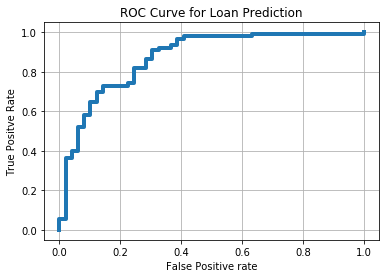

In [8]:
# Understand and implement AUC ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get the Area Under the ROC Curve
auc = roc_auc_score(Y_test, Y_prob)

# plot ROC
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.xlabel("False Positive rate")
plt.ylabel("True Positve Rate")
plt.title("ROC Curve for Loan Prediction")
plt.grid()